In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Kaggel Veri Çekme İşleme

In [ ]:
! pip install opendatasets

In [ ]:

import opendatasets as od
od.download("https://www.kaggle.com/datasets/atikaakter11/brain-tumor-segmentation-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 14cfc9e3185aeccf1cd4e106e9b4cdd9
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/atikaakter11/brain-tumor-segmentation-dataset


100%|██████████| 106M/106M [00:01<00:00, 82.8MB/s] 


### Toplam  Kaç Tane  jpg Bulunmakta

In [ ]:
import os

image_dir = "/content/brain-tumor-segmentation-dataset/Brain_Tumor_Segmentation_Dataset/image"
jpg_count = 0

for root, _, files in os.walk(image_dir):
    for file in files:
        if file.lower().endswith(".jpg"):
            jpg_count += 1

print(f"Toplam {jpg_count} adet JPG dosyası bulundu.")

Toplam 4237 adet JPG dosyası bulundu.


### Toplam Kaç Tane Sınıf Bulunmakta

In [ ]:
import os

image_dir = "/content/brain-tumor-segmentation-dataset/Brain_Tumor_Segmentation_Dataset/image"
class_counts = {}

for root, _, files in os.walk(image_dir):
    for file in files:
        class_name = os.path.basename(root)
        if class_name not in class_counts:
            class_counts[class_name] = 0
        class_counts[class_name] += 1

print("Sınıflar ve sayıları:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

Sınıflar ve sayıları:
3: 994
2: 999
0: 1595
1: 649


### 0 Klasörü Sil

In [ ]:
import shutil
import os

# Silinecek klasörün yolu
klasor_yolu = "/content/brain-tumor-segmentation-dataset/Brain_Tumor_Segmentation_Dataset/image/0"

# Klasörün var olup olmadığını kontrol et
if os.path.exists(klasor_yolu):
  try:
    shutil.rmtree(klasor_yolu)
    print(f"{klasor_yolu} klasörü başarıyla silindi.")
  except OSError as e:
    print(f"Klasör silinirken hata oluştu: {e}")
else:
  print(f"{klasor_yolu} klasörü bulunamadı.")

/content/brain-tumor-segmentation-dataset/Brain_Tumor_Segmentation_Dataset/image/0 klasörü başarıyla silindi.


### Kaç Tane Sınıf Bulunmakta

In [ ]:
import os

image_dir = "/content/brain-tumor-segmentation-dataset/Brain_Tumor_Segmentation_Dataset/image"
class_counts = {}

for root, _, files in os.walk(image_dir):
    for file in files:
        class_name = os.path.basename(root)
        if class_name not in class_counts:
            class_counts[class_name] = 0
        class_counts[class_name] += 1

print("Sınıflar ve sayıları:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

Sınıflar ve sayıları:
3: 994
2: 999
1: 649


### Label İşlemi

In [ ]:
### Burada kordinant çizelgesi bulunmamaktadır

import os
import cv2
import numpy as np
from tqdm import tqdm

# Her sınıf için giriş ve çıkış yolları
classes = {
    "Glioma": {
        "mri_path": "/content/brain-tumor-segmentation-dataset/Brain_Tumor_Segmentation_Dataset/image/1",
        "mask_path": "/content/brain-tumor-segmentation-dataset/Brain_Tumor_Segmentation_Dataset/mask/1",
        "output_images_path": "/content/Label_İslemi/Glioma/images",
        "output_labels_path": "/content/Label_İslemi/Glioma/labels",
        "class_id": 0,
    },
    "Meningioma": {
        "mri_path": "/content/brain-tumor-segmentation-dataset/Brain_Tumor_Segmentation_Dataset/image/2",
        "mask_path": "/content/brain-tumor-segmentation-dataset/Brain_Tumor_Segmentation_Dataset/mask/2",
        "output_images_path": "/content/Label_İslemi/Meningioma/images",
        "output_labels_path": "/content/Label_İslemi/Meningioma/labels",
        "class_id": 1,
    },
    "Pituitary": {
        "mri_path": "/content/brain-tumor-segmentation-dataset/Brain_Tumor_Segmentation_Dataset/image/3",
        "mask_path": "/content/brain-tumor-segmentation-dataset/Brain_Tumor_Segmentation_Dataset/mask/3",
        "output_images_path": "/content/Label_İslemi/Pituitary/images",
        "output_labels_path": "/content/Label_İslemi/Pituitary/labels",
        "class_id": 2,
    },
}

# Her sınıf için işlemleri yap
for class_name, paths in classes.items():
    # Giriş ve çıkış yollarını ayarla
    mri_images_path = paths["mri_path"]
    mask_images_path = paths["mask_path"]
    output_images_path = paths["output_images_path"]
    output_labels_path = paths["output_labels_path"]
    class_id = paths["class_id"]

    # Çıktı klasörlerini oluştur
    os.makedirs(output_images_path, exist_ok=True)
    os.makedirs(output_labels_path, exist_ok=True)

    # Tüm MRI ve maskeleri sıralı şekilde oku
    mri_files = sorted(os.listdir(mri_images_path))
    mask_files = sorted(os.listdir(mask_images_path))

    print(f"{class_name} sınıfı için işleme başlanıyor...")

    # Görüntüleri işle
    for mri_file, mask_file in tqdm(zip(mri_files, mask_files), total=len(mri_files)):
        # Dosya yollarını birleştir
        mri_image_path = os.path.join(mri_images_path, mri_file)
        mask_image_path = os.path.join(mask_images_path, mask_file)

        # Maskedeki segmentasyon alanlarını bul
        mask_image = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)

        # Segmentasyon alanlarını bul
        contours, _ = cv2.findContours(mask_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Etiket dosyasını oluştur
        label_file_path = os.path.join(output_labels_path, f"{os.path.splitext(mri_file)[0]}.txt")
        with open(label_file_path, "w") as f:
            for contour in contours:
                x, y, w, h = cv2.boundingRect(contour)

                # YOLO formatında koordinatları hesapla
                img_height, img_width = mask_image.shape
                x_center = (x + w / 2) / img_width
                y_center = (y + h / 2) / img_height
                width = w / img_width
                height = h / img_height

                # Etiket dosyasına yaz
                f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

        # Orijinal görüntüyü başka bir klasöre kopyala
        output_image_path = os.path.join(output_images_path, mri_file)
        if not os.path.exists(output_image_path):  # Görüntü daha önce kopyalanmamışsa
            cv2.imwrite(output_image_path, cv2.imread(mri_image_path))

    print(f"{class_name} sınıfı için işlem tamamlandı!")


Glioma sınıfı için işleme başlanıyor...


100%|██████████| 649/649 [00:03<00:00, 215.86it/s]


Glioma sınıfı için işlem tamamlandı!
Meningioma sınıfı için işleme başlanıyor...


100%|██████████| 999/999 [00:03<00:00, 255.82it/s]


Meningioma sınıfı için işlem tamamlandı!
Pituitary sınıfı için işleme başlanıyor...


100%|██████████| 994/994 [00:03<00:00, 320.95it/s]

Pituitary sınıfı için işlem tamamlandı!


### Her Sınıfta Kaç Tene Veri Bulunmaktadır

In [ ]:

import os

def count_jpg_files(directory):
  """Counts the number of JPG files in a given directory and its subdirectories.

  Args:
    directory: The path to the directory to search.

  Returns:
    The number of JPG files found.
  """
  jpg_count = 0
  for root, _, files in os.walk(directory):
      for file in files:
          if file.lower().endswith(".jpg"):
              jpg_count += 1
  return jpg_count

directories = [
    "/content/Label_İslemi/Glioma/images",
    "/content/Label_İslemi/Meningioma/images",
    "/content/Label_İslemi/Pituitary/images"
]

for directory in directories:
  count = count_jpg_files(directory)
  print(f"Number of JPG files in {directory}: {count}")

Number of JPG files in /content/Label_İslemi/Glioma/images: 649
Number of JPG files in /content/Label_İslemi/Meningioma/images: 999
Number of JPG files in /content/Label_İslemi/Pituitary/images: 994


### Elimde Toplam Kaç Tene Veri Bulunmaktadır

In [ ]:

import os

def count_images(directory):
  """Counts the number of image files in a directory.

  Args:
    directory: The path to the directory.

  Returns:
    The number of image files in the directory.
  """
  image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')  # Add more if needed
  count = 0
  for filename in os.listdir(directory):
    if filename.lower().endswith(image_extensions):
      count += 1
  return count

# Example usage (replace with your actual directory)
directory_path = "/content/Label_İslemi"
total_image_count = 0

for root, _, files in os.walk(directory_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            total_image_count += 1

print(f"Toplam görüntü sayısı: {total_image_count}")

Toplam görüntü sayısı: 2642


### Train , Test , Valid  İşlemi

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Ana klasör ve sınıf yolları
base_folder = "/content/Label_İslemi"
output_folder = "/content/Train_Test_Valid_Label_İslemi"
class_paths = {
    "Glioma": {
        "images": "/content/Label_İslemi/Glioma/images",
        "labels": "/content/Label_İslemi/Glioma/labels"
    },
    "Meningioma": {
        "images": "/content/Label_İslemi/Meningioma/images",
        "labels": "/content/Label_İslemi/Meningioma/labels"
    },
    "Pituitary": {
        "images": "/content/Label_İslemi/Pituitary/images",
        "labels": "/content/Label_İslemi/Pituitary/labels"
    }
}

# Sınıf isimleri ve sınıf haritası
class_names = ['Glioma', 'Meningioma', 'Pituitary']
class_map = {
    "Glioma": 0,
    "Meningioma": 1,
    "Pituitary": 2
}

# Oranlar
train_ratio = 0.7
valid_ratio = 0.2

def ensure_dirs_exist(base_dir):
    os.makedirs(os.path.join(base_dir, "train", "images"), exist_ok=True)
    os.makedirs(os.path.join(base_dir, "train", "labels"), exist_ok=True)
    os.makedirs(os.path.join(base_dir, "valid", "images"), exist_ok=True)
    os.makedirs(os.path.join(base_dir, "valid", "labels"), exist_ok=True)
    os.makedirs(os.path.join(base_dir, "test", "images"), exist_ok=True)
    os.makedirs(os.path.join(base_dir, "test", "labels"), exist_ok=True)

ensure_dirs_exist(output_folder)

# Dosyaları kopyalama fonksiyonu
def copy_files(pairs, src_images, src_labels, dest_images, dest_labels, class_id):
    for img_file, lbl_file in pairs:
        # Görüntü dosyasını kopyala
        shutil.copy(os.path.join(src_images, img_file), os.path.join(dest_images, img_file))

        # Etiket dosyasını düzenle ve kopyala
        with open(os.path.join(src_labels, lbl_file), 'r') as src_lbl:
            lines = src_lbl.readlines()
            updated_lines = [f"{class_id} " + " ".join(line.split()[1:]) + "\n" for line in lines]

        with open(os.path.join(dest_labels, lbl_file), 'w') as dest_lbl:
            dest_lbl.writelines(updated_lines)

# Her sınıf için işlem
def process_class(class_name, paths, output_folder):
    images_folder = paths["images"]
    labels_folder = paths["labels"]

    if not os.path.exists(images_folder) or not os.path.exists(labels_folder):
        print(f"Hata: {images_folder} veya {labels_folder} bulunamadı.")
        return

    image_files = sorted(os.listdir(images_folder))
    label_files = sorted(os.listdir(labels_folder))

    # Ortak dosyaları eşleştir
    image_names = {os.path.splitext(img)[0] for img in image_files}
    label_names = {os.path.splitext(lbl)[0] for lbl in label_files}
    common_names = image_names.intersection(label_names)
    paired_files = [(f"{name}.jpg", f"{name}.txt") for name in common_names]

    # Train-Test-Valid bölmesi
    train_files, temp_files = train_test_split(paired_files, test_size=(1 - train_ratio), random_state=42)
    valid_files, test_files = train_test_split(temp_files, test_size=(1 - valid_ratio), random_state=42)

    # Dosyaları kopyala
    copy_files(train_files, images_folder, labels_folder, os.path.join(output_folder, "train", "images"), os.path.join(output_folder, "train", "labels"), class_map[class_name])
    copy_files(valid_files, images_folder, labels_folder, os.path.join(output_folder, "valid", "images"), os.path.join(output_folder, "valid", "labels"), class_map[class_name])
    copy_files(test_files, images_folder, labels_folder, os.path.join(output_folder, "test", "images"), os.path.join(output_folder, "test", "labels"), class_map[class_name])

# Tüm sınıfları işle
for class_name, paths in class_paths.items():
    print(f"{class_name} sınıfı işleniyor...")
    process_class(class_name, paths, output_folder)
    print(f"{class_name} sınıfı tamamlandı.")

print("Tüm veri başarıyla işlendi ve bölündü.")


Glioma sınıfı işleniyor...
Glioma sınıfı tamamlandı.
Meningioma sınıfı işleniyor...
Meningioma sınıfı tamamlandı.
Pituitary sınıfı işleniyor...
Pituitary sınıfı tamamlandı.
Tüm veri başarıyla işlendi ve bölündü.


### Tekrardan Veri Sayımı Kontrol Ediyorum

In [ ]:
import os

def count_jpg_files(directory):
  """Counts the number of JPG files in a given directory and its subdirectories.

  Args:
    directory: The path to the directory to search.

  Returns:
    The number of JPG files found.
  """
  jpg_count = 0
  for root, _, files in os.walk(directory):
      for file in files:
          if file.lower().endswith(".jpg"):
              jpg_count += 1
  return jpg_count

directories = [
    "/content/Train_Test_Valid_Label_İslemi/test/images",
    "/content/Train_Test_Valid_Label_İslemi/train/images",
    "/content/Train_Test_Valid_Label_İslemi/valid/images"
]

for directory in directories:
  count = count_jpg_files(directory)
  print(f"Number of JPG files in {directory}: {count}")

Number of JPG files in /content/Train_Test_Valid_Label_İslemi/test/images: 636
Number of JPG files in /content/Train_Test_Valid_Label_İslemi/train/images: 1848
Number of JPG files in /content/Train_Test_Valid_Label_İslemi/valid/images: 158


### İmage veriseti ile Labels Veri Seti Arasındaki Uyumsuzluğu Kontrol Ediyorum

In [ ]:
import os

# Klasör yolları
image_folder = '/content/Train_Test_Valid_Label_İslemi/train/images'
label_folder = '/content/Train_Test_Valid_Label_İslemi/train/labels'

# Dosya isimlerini toplama
image_files = {os.path.splitext(f)[0] for f in os.listdir(image_folder) if f.endswith('.jpg')}
label_files = {os.path.splitext(f)[0] for f in os.listdir(label_folder) if f.endswith('.txt')}

# Karşılaştırma: Sadece image'da olanlar, sadece label'da olanlar
only_in_images = image_files - label_files
only_in_labels = label_files - image_files

# Sonuçları gösterme
only_in_images, only_in_labels


(set(), set())

### Buradaki İşlem Box Hatasını Düzelmekdir ( Çoklu Kordinant Hatası)

In [ ]:
import os

# Etiket dosyalarının bulunduğu klasörler
test_label_folder = '/content/Train_Test_Valid_Label_İslemi/test/labels'
train_label_folder = '/content/Train_Test_Valid_Label_İslemi/train/labels'
valid_label_folder = '/content/Train_Test_Valid_Label_İslemi/valid/labels'

# Yeni etiketlerin kaydedileceği klasörler
new_base_folder = '/content/Box_Temiz_Train_Test_Valid_Label_İslemi'  # Yeni oluşturulacak üst klasör
test_output_folder = os.path.join(new_base_folder, 'test/labels')
train_output_folder = os.path.join(new_base_folder, 'train/labels')
valid_output_folder = os.path.join(new_base_folder, 'valid/labels')

# Yeni klasörleri oluştur
os.makedirs(test_output_folder, exist_ok=True)
os.makedirs(train_output_folder, exist_ok=True)
os.makedirs(valid_output_folder, exist_ok=True)

# Verilen kordinatlar
def process_labels(label_file):
    with open(label_file, 'r') as f:
        data = f.read()

    boxes = []
    for line in data.strip().split("\n"):
        parts = line.split()
        class_id = int(parts[0])

        # Eğer satırda birden fazla box varsa her biri için işleme yapıyoruz
        for i in range(1, len(parts[1:]), 4):
            x_center, y_center, width, height = map(float, parts[i:i+4])
            area = width * height  # Alanı hesapla
            boxes.append((class_id, x_center, y_center, width, height, area))

    # En büyük alanı kaplayan box'ı bulma
    largest_box = max(boxes, key=lambda x: x[5])
    return largest_box

# Test etiket dosyalarını işle
for label_file in os.listdir(test_label_folder):
    if label_file.endswith('.txt'):
        label_file_path = os.path.join(test_label_folder, label_file)
        largest_box = process_labels(label_file_path)

        # Yeni dosya yolu
        new_file_path = os.path.join(test_output_folder, label_file)

        # En büyük alanı kaplayan box'ı içeren veriyi yazma
        with open(new_file_path, 'w') as new_file:
            new_file.write(f"{largest_box[0]} {largest_box[1]} {largest_box[2]} {largest_box[3]} {largest_box[4]}\n")

        print(f"Test klasöründe işlem tamamlandı: {label_file} -> {new_file_path}")

# Train etiket dosyalarını işle
for label_file in os.listdir(train_label_folder):
    if label_file.endswith('.txt'):
        label_file_path = os.path.join(train_label_folder, label_file)
        largest_box = process_labels(label_file_path)

        # Yeni dosya yolu
        new_file_path = os.path.join(train_output_folder, label_file)

        # En büyük alanı kaplayan box'ı içeren veriyi yazma
        with open(new_file_path, 'w') as new_file:
            new_file.write(f"{largest_box[0]} {largest_box[1]} {largest_box[2]} {largest_box[3]} {largest_box[4]}\n")

        print(f"Train klasöründe işlem tamamlandı: {label_file} -> {new_file_path}")

# Valid etiket dosyalarını işle
for label_file in os.listdir(valid_label_folder):
    if label_file.endswith('.txt'):
        label_file_path = os.path.join(valid_label_folder, label_file)
        largest_box = process_labels(label_file_path)

        # Yeni dosya yolu
        new_file_path = os.path.join(valid_output_folder, label_file)

        # En büyük alanı kaplayan box'ı içeren veriyi yazma
        with open(new_file_path, 'w') as new_file:
            new_file.write(f"{largest_box[0]} {largest_box[1]} {largest_box[2]} {largest_box[3]} {largest_box[4]}\n")

        print(f"Valid klasöründe işlem tamamlandı: {label_file} -> {new_file_path}")


Test klasöründe işlem tamamlandı: Tr-pi_0695.txt -> /content/Box_Temiz_Train_Test_Valid_Label_İslemi/test/labels/Tr-pi_0695.txt
Test klasöründe işlem tamamlandı: Tr-pi_0641.txt -> /content/Box_Temiz_Train_Test_Valid_Label_İslemi/test/labels/Tr-pi_0641.txt
Test klasöründe işlem tamamlandı: Tr-me_0130.txt -> /content/Box_Temiz_Train_Test_Valid_Label_İslemi/test/labels/Tr-me_0130.txt
Test klasöründe işlem tamamlandı: Tr-gl_0095.txt -> /content/Box_Temiz_Train_Test_Valid_Label_İslemi/test/labels/Tr-gl_0095.txt
Test klasöründe işlem tamamlandı: Tr-me_0758.txt -> /content/Box_Temiz_Train_Test_Valid_Label_İslemi/test/labels/Tr-me_0758.txt
Test klasöründe işlem tamamlandı: Tr-gl_1202.txt -> /content/Box_Temiz_Train_Test_Valid_Label_İslemi/test/labels/Tr-gl_1202.txt
Test klasöründe işlem tamamlandı: Tr-pi_0444.txt -> /content/Box_Temiz_Train_Test_Valid_Label_İslemi/test/labels/Tr-pi_0444.txt
Test klasöründe işlem tamamlandı: Tr-me_0124.txt -> /content/Box_Temiz_Train_Test_Valid_Label_İslemi/tes

### Her Sınıfta Kaç Tane Veriseti Var Onu Kontrol Ediyorum

In [ ]:
import os

def count_class_occurrences(directory, class_names):
    class_counts = {class_name: 0 for class_name in class_names}
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            filepath = os.path.join(directory, filename)
            with open(filepath, "r") as f:
                for line in f:
                    try:
                        class_id = int(line.split()[0])
                        if 0 <= class_id < len(class_names):
                            class_counts[class_names[class_id]] += 1
                    except (IndexError, ValueError):
                        print(f"Warning: Skipping invalid line in {filename}: {line.strip()}")
    return class_counts


directory = "/content/Box_Temiz_Train_Test_Valid_Label_İslemi/train/labels"
class_names = ['Glioma', 'Meningioma', 'Pituitary']  # Your class names

class_counts = count_class_occurrences(directory, class_names)

for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

Glioma: 454
Meningioma: 699
Pituitary: 695


### Eğitm İçin Gerekli Olan yaml Dosyasını Oluşturma İşlemi

In [ ]:
import os

# Define the path to the directory
data_yaml_path = "/content/Box_Temiz_Train_Test_Valid_Label_İslemi"

# Check if the directory exists
if not os.path.exists(data_yaml_path):
    print(f"Error: Directory '{data_yaml_path}' not found.")
else:
    # Create the data.yaml file
    yaml_file_path = os.path.join(data_yaml_path, "data.yaml")
    with open(yaml_file_path, "w") as f:
        f.write("""
train: train/images
val: valid/images
test: test/images

nc: 3  # Number of classes
names: ['Glioma', 'Meningioma', 'Pituitary']
        """)
    print(f"data.yaml file created at: {yaml_file_path}")

data.yaml file created at: /content/Box_Temiz_Train_Test_Valid_Label_İslemi/data.yaml


In [ ]:
# YOLO kütüphanesi ve gerekli modüllerin yüklenmesi
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.6/911.6 kB 25.0 MB/s eta 0:00:00


In [ ]:
import cv2
import os

# Görüntü dosyalarının bulunduğu dizin
image_dir = "/content/Label_İslemi/Glioma/images"  # Örnek dizin, kendi dizininizi belirtin

# İlk görüntünün boyutunu kontrol etme
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

if image_files:
    first_image_path = os.path.join(image_dir, image_files[0])
    img = cv2.imread(first_image_path)
    if img is not None:
        height, width, _ = img.shape
        print(f"İlk görüntünün boyutu: {width}x{height}")
    else:
        print(f"Görüntü dosyası yüklenemedi: {first_image_path}")
else:
    print(f"Belirtilen dizinde görüntü dosyası bulunamadı: {image_dir}")

İlk görüntünün boyutu: 512x512


### Eğitimi Başlatma İşlemi

In [ ]:
# YOLOv11 eğitim süreci
from ultralytics import YOLO

# Model oluşturma
model = YOLO('yolo11n.pt')  # YOLOv11 küçük model kullanılıyor, yolov8n en yakın yapılandırma

# Eğitim
model.train(
    data='/content/Box_Temiz_Train_Test_Valid_Label_İslemi/data.yaml',  # Roboflow formatındaki YAML dosyası
    epochs=150,                                      # Eğitim dönemleri
    batch=17,                                       # Batch boyutu
    imgsz=512,                                      # Görüntü boyutu
    workers=10,                                      # Paralel iş parçacıkları
    name="yolo_v11_model",                          # Eğitim adı
    project="yolo_training_1"                         # Proje adı
)

# Eğitim tamamlandıktan sonra sonuçlar 'runs/train/yolo_v11_model/' dizininde bulunur.


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 87.8MB/s]


Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Box_Temiz_Train_Test_Valid_Label_İslemi/data.yaml, epochs=150, time=None, patience=100, batch=17, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=10, project=yolo_training_1, name=yolo_v11_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cr

100%|██████████| 755k/755k [00:00<00:00, 23.2MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Box_Temiz_Train_Test_Valid_Label_İslemi/train/labels... 1848 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1848/1848 [00:00<00:00, 2343.54it/s]


train: New cache created: /content/Box_Temiz_Train_Test_Valid_Label_İslemi/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/Box_Temiz_Train_Test_Valid_Label_İslemi/valid/labels... 158 images, 0 backgrounds, 0 corrupt: 100%|██████████| 158/158 [00:00<00:00, 1699.26it/s]

val: New cache created: /content/Box_Temiz_Train_Test_Valid_Label_İslemi/valid/labels.cache


Plotting labels to yolo_training_1/yolo_v11_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.00053125), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to yolo_training_1/yolo_v11_model
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      1.67G      1.546      3.191      1.401         17        512: 100%|██████████| 109/109 [00:29<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]

                   all        158        158      0.569      0.417      0.482      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      1.65G      1.573      2.194      1.405         17        512: 100%|██████████| 109/109 [00:29<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.88it/s]

                   all        158        158      0.576      0.497      0.506      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      1.66G      1.608      1.959      1.433         16        512: 100%|██████████| 109/109 [00:28<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.00it/s]

                   all        158        158      0.615      0.481      0.467      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      1.64G      1.567       1.72      1.384         13        512: 100%|██████████| 109/109 [00:27<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.13it/s]

                   all        158        158      0.596      0.605      0.576      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      1.65G      1.539      1.578      1.379         23        512: 100%|██████████| 109/109 [00:28<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]

                   all        158        158      0.605       0.62      0.568      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      1.65G      1.562      1.526        1.4         24        512: 100%|██████████| 109/109 [00:26<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.03it/s]

                   all        158        158      0.755      0.565       0.64      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      1.65G      1.498      1.383       1.36         18        512: 100%|██████████| 109/109 [00:30<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.71it/s]

                   all        158        158      0.778      0.593      0.617      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      1.64G      1.523      1.414      1.359         18        512: 100%|██████████| 109/109 [00:26<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.17it/s]

                   all        158        158      0.671      0.547        0.6      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      1.65G      1.456      1.322      1.324         18        512: 100%|██████████| 109/109 [00:30<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.23it/s]

                   all        158        158       0.67       0.59      0.605      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      1.65G       1.44      1.291      1.329         12        512: 100%|██████████| 109/109 [00:26<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.07it/s]

                   all        158        158      0.517      0.603      0.588      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      1.65G      1.459      1.288      1.325         11        512: 100%|██████████| 109/109 [00:29<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.31it/s]

                   all        158        158      0.711      0.627      0.617      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      1.64G      1.436      1.226      1.306         24        512: 100%|██████████| 109/109 [00:27<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.75it/s]

                   all        158        158      0.653      0.648      0.627      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      1.65G      1.413      1.171      1.279         18        512: 100%|██████████| 109/109 [00:28<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.26it/s]

                   all        158        158      0.672      0.722        0.7      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      1.65G      1.435      1.189       1.31         18        512: 100%|██████████| 109/109 [00:28<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.07it/s]

                   all        158        158      0.745      0.624       0.65      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      1.65G      1.408      1.146      1.295         21        512: 100%|██████████| 109/109 [00:26<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.39it/s]

                   all        158        158      0.674      0.692      0.664      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      1.64G      1.423      1.198      1.295         17        512: 100%|██████████| 109/109 [00:30<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.96it/s]

                   all        158        158      0.702      0.711      0.658       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      1.65G      1.425       1.14      1.299          9        512: 100%|██████████| 109/109 [00:26<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]

                   all        158        158      0.764      0.673      0.663      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      1.65G      1.415      1.113      1.286         22        512: 100%|██████████| 109/109 [00:29<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.21it/s]

                   all        158        158      0.787       0.71      0.693      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      1.65G      1.401       1.13      1.291         25        512: 100%|██████████| 109/109 [00:26<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.23it/s]

                   all        158        158      0.779      0.729        0.7      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      1.64G      1.408       1.12      1.295         19        512: 100%|██████████| 109/109 [00:28<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.14it/s]

                   all        158        158       0.75      0.715      0.698      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      1.65G      1.408      1.127       1.28         17        512: 100%|██████████| 109/109 [00:28<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.25it/s]


                   all        158        158      0.743      0.711      0.699      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      1.65G      1.382      1.119      1.267         14        512: 100%|██████████| 109/109 [00:26<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.08it/s]

                   all        158        158      0.697      0.718      0.678      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      1.65G      1.354      1.089      1.253         27        512: 100%|██████████| 109/109 [00:29<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.04it/s]

                   all        158        158      0.626      0.685      0.643       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      1.64G      1.364       1.08      1.274         12        512: 100%|██████████| 109/109 [00:26<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.13it/s]

                   all        158        158      0.737      0.738      0.697      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      1.65G      1.368      1.044      1.269         24        512: 100%|██████████| 109/109 [00:30<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.32it/s]

                   all        158        158      0.754      0.716      0.685      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      1.65G      1.347      1.057      1.257         21        512: 100%|██████████| 109/109 [00:26<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.07it/s]

                   all        158        158       0.75      0.735      0.694      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      1.65G      1.358      1.057      1.253         15        512: 100%|██████████| 109/109 [00:30<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.15it/s]

                   all        158        158      0.826      0.707      0.737      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      1.64G      1.354      1.027      1.259         15        512: 100%|██████████| 109/109 [00:26<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.32it/s]

                   all        158        158      0.783      0.679      0.704       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      1.65G      1.352       1.08      1.278         11        512: 100%|██████████| 109/109 [00:29<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.19it/s]

                   all        158        158      0.779      0.707      0.702      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      1.66G      1.361      1.083      1.269         20        512: 100%|██████████| 109/109 [00:26<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.17it/s]

                   all        158        158      0.769      0.718      0.703      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      1.65G      1.337      1.015      1.243         17        512: 100%|██████████| 109/109 [00:29<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.87it/s]

                   all        158        158      0.731      0.702      0.703      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      1.64G       1.33      1.024      1.236         27        512: 100%|██████████| 109/109 [00:28<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]

                   all        158        158        0.8      0.739      0.728      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      1.65G      1.351      1.018      1.254         17        512: 100%|██████████| 109/109 [00:27<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.21it/s]

                   all        158        158      0.761      0.741      0.706      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      1.65G      1.331      1.014      1.262         18        512: 100%|██████████| 109/109 [00:29<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.50it/s]

                   all        158        158      0.762      0.721      0.696      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      1.65G      1.345      1.003      1.244         24        512: 100%|██████████| 109/109 [00:26<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.02it/s]

                   all        158        158       0.83      0.718      0.715      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      1.64G      1.356      1.003      1.247         24        512: 100%|██████████| 109/109 [00:30<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.14it/s]

                   all        158        158      0.774      0.724      0.692      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      1.65G      1.331      1.021      1.248         14        512: 100%|██████████| 109/109 [00:25<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.34it/s]

                   all        158        158      0.777      0.712      0.723      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      1.65G      1.307     0.9436      1.222         17        512: 100%|██████████| 109/109 [00:29<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.03it/s]

                   all        158        158      0.777      0.768      0.726      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      1.65G      1.302     0.9582      1.219         19        512: 100%|██████████| 109/109 [00:27<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.10it/s]

                   all        158        158      0.773      0.744      0.719      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      1.64G      1.319      0.998      1.239         20        512: 100%|██████████| 109/109 [00:28<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]

                   all        158        158      0.738      0.787      0.745      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      1.65G      1.324       0.95      1.238         19        512: 100%|██████████| 109/109 [00:28<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.62it/s]

                   all        158        158      0.716      0.719       0.69       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      1.65G      1.273     0.9422      1.216         21        512: 100%|██████████| 109/109 [00:26<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.12it/s]

                   all        158        158      0.724      0.761      0.712      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      1.65G      1.316     0.9539      1.237         20        512: 100%|██████████| 109/109 [00:29<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.77it/s]

                   all        158        158      0.785      0.756      0.735      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      1.64G      1.301     0.9427      1.233         13        512: 100%|██████████| 109/109 [00:26<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.24it/s]

                   all        158        158      0.809      0.721      0.729      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      1.65G      1.309     0.9578      1.242         23        512: 100%|██████████| 109/109 [00:30<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.08it/s]

                   all        158        158      0.817      0.756      0.748      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      1.65G      1.282     0.9553      1.214         19        512: 100%|██████████| 109/109 [00:26<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.25it/s]

                   all        158        158      0.789      0.767      0.749      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      1.65G      1.269     0.9223      1.209         17        512: 100%|██████████| 109/109 [00:29<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.32it/s]

                   all        158        158      0.797      0.749      0.717      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      1.64G      1.282     0.9398      1.218         16        512: 100%|██████████| 109/109 [00:26<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.22it/s]

                   all        158        158      0.795      0.776      0.727      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      1.65G      1.261     0.9196      1.204         21        512: 100%|██████████| 109/109 [00:28<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]

                   all        158        158      0.806      0.737      0.714      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      1.65G      1.293     0.9013      1.224         18        512: 100%|██████████| 109/109 [00:28<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.64it/s]

                   all        158        158      0.819      0.742      0.737      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      1.65G       1.27     0.9177      1.215         12        512: 100%|██████████| 109/109 [00:27<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.11it/s]

                   all        158        158      0.773      0.732      0.711      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      1.64G      1.298     0.9338      1.221         19        512: 100%|██████████| 109/109 [00:28<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.93it/s]

                   all        158        158      0.793       0.76      0.731      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      1.65G      1.297     0.9282       1.22         16        512: 100%|██████████| 109/109 [00:26<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.33it/s]

                   all        158        158      0.819      0.732      0.729      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      1.65G      1.254     0.9052      1.202         21        512: 100%|██████████| 109/109 [00:30<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.95it/s]

                   all        158        158      0.778      0.777      0.735      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      1.65G      1.258     0.8943      1.198         21        512: 100%|██████████| 109/109 [00:26<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.17it/s]

                   all        158        158      0.759      0.798      0.744      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      1.64G      1.258     0.9098       1.21         27        512: 100%|██████████| 109/109 [00:30<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.25it/s]

                   all        158        158      0.793      0.787      0.764      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      1.65G      1.251     0.8828      1.183         21        512: 100%|██████████| 109/109 [00:26<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.26it/s]

                   all        158        158      0.741      0.769      0.727      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      1.66G      1.264      0.898      1.208         12        512: 100%|██████████| 109/109 [00:29<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.12it/s]

                   all        158        158      0.773      0.743      0.726      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      1.65G      1.258     0.8934      1.204         17        512: 100%|██████████| 109/109 [00:26<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.13it/s]

                   all        158        158       0.79      0.741      0.738      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      1.64G      1.217     0.8498      1.184         17        512: 100%|██████████| 109/109 [00:29<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.00it/s]


                   all        158        158      0.769      0.776       0.73      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      1.65G      1.217     0.8787      1.183         17        512: 100%|██████████| 109/109 [00:27<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.24it/s]

                   all        158        158      0.769      0.769      0.742      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      1.65G      1.214     0.8476      1.184         17        512: 100%|██████████| 109/109 [00:27<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.04it/s]

                   all        158        158      0.812      0.757      0.736      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      1.66G      1.236     0.8815      1.204         23        512: 100%|██████████| 109/109 [00:28<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.24it/s]

                   all        158        158      0.775      0.783      0.737      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      1.64G      1.208     0.8489      1.176         23        512: 100%|██████████| 109/109 [00:26<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.20it/s]

                   all        158        158        0.8      0.769      0.752      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      1.65G      1.255     0.8977      1.211         24        512: 100%|██████████| 109/109 [00:29<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.71it/s]

                   all        158        158      0.794      0.803      0.751      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      1.65G      1.199     0.8464      1.169         21        512: 100%|██████████| 109/109 [00:26<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.32it/s]

                   all        158        158      0.785      0.776      0.746      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      1.65G      1.214     0.8585      1.177         26        512: 100%|██████████| 109/109 [00:30<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.28it/s]

                   all        158        158       0.83      0.769      0.742      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      1.64G      1.202      0.842      1.174         21        512: 100%|██████████| 109/109 [00:25<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.18it/s]

                   all        158        158      0.766      0.768      0.729      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      1.65G      1.182     0.8354       1.15         21        512: 100%|██████████| 109/109 [00:29<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.96it/s]

                   all        158        158      0.786      0.757      0.732      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      1.65G      1.212      0.877      1.177         25        512: 100%|██████████| 109/109 [00:26<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.99it/s]

                   all        158        158      0.796      0.788      0.752      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      1.65G      1.188     0.8365      1.168         22        512: 100%|██████████| 109/109 [00:29<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.31it/s]

                   all        158        158      0.838       0.76      0.744      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      1.64G      1.185     0.8199      1.154         15        512: 100%|██████████| 109/109 [00:26<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.00it/s]

                   all        158        158      0.864      0.763      0.748      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      1.65G       1.21      0.851      1.176         16        512: 100%|██████████| 109/109 [00:27<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]

                   all        158        158      0.796      0.736       0.74       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      1.66G      1.188     0.8588      1.173         18        512: 100%|██████████| 109/109 [00:27<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.85it/s]

                   all        158        158      0.801      0.786      0.752      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      1.66G      1.213     0.8688      1.184         20        512: 100%|██████████| 109/109 [00:26<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.17it/s]

                   all        158        158      0.809      0.768      0.761      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      1.64G      1.185     0.8516      1.179         22        512: 100%|██████████| 109/109 [00:28<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.15it/s]

                   all        158        158      0.795      0.773      0.756      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      1.65G      1.197     0.8483      1.178         19        512: 100%|██████████| 109/109 [00:26<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.15it/s]

                   all        158        158      0.772       0.78      0.752        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      1.66G      1.172     0.8236      1.155         16        512: 100%|██████████| 109/109 [00:30<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]

                   all        158        158       0.78      0.809      0.753      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      1.66G       1.18     0.8384      1.172         12        512: 100%|██████████| 109/109 [00:26<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.27it/s]

                   all        158        158      0.811      0.779      0.742       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      1.64G      1.147     0.8091      1.135         20        512: 100%|██████████| 109/109 [00:30<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.19it/s]

                   all        158        158      0.776      0.806      0.756      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      1.65G       1.16     0.7954      1.148         21        512: 100%|██████████| 109/109 [00:25<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.25it/s]

                   all        158        158      0.797      0.769       0.74      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      1.65G      1.178     0.8264      1.171         14        512: 100%|██████████| 109/109 [00:29<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.13it/s]

                   all        158        158      0.784      0.772      0.745      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      1.65G      1.193     0.8212      1.163         24        512: 100%|██████████| 109/109 [00:27<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]

                   all        158        158      0.829      0.704      0.715       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      1.64G      1.151     0.7862      1.145         20        512: 100%|██████████| 109/109 [00:28<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.13it/s]

                   all        158        158      0.841      0.744       0.75      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      1.65G      1.153     0.7928      1.146         14        512: 100%|██████████| 109/109 [00:27<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.95it/s]

                   all        158        158      0.818      0.763      0.752      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      1.65G      1.174     0.8233      1.155         16        512: 100%|██████████| 109/109 [00:26<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.38it/s]

                   all        158        158      0.812      0.728      0.742      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      1.65G      1.145      0.782      1.142         15        512: 100%|██████████| 109/109 [00:29<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.94it/s]

                   all        158        158      0.811      0.778      0.746      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      1.64G      1.159     0.8234      1.156         22        512: 100%|██████████| 109/109 [00:26<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.24it/s]

                   all        158        158      0.771      0.775      0.737      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      1.65G      1.126      0.784      1.137         22        512: 100%|██████████| 109/109 [00:29<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.16it/s]

                   all        158        158      0.783      0.787      0.748      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      1.65G       1.15     0.7899      1.148         17        512: 100%|██████████| 109/109 [00:26<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.46it/s]

                   all        158        158        0.8      0.803      0.757      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      1.65G      1.153      0.798      1.153         15        512: 100%|██████████| 109/109 [00:28<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.45it/s]

                   all        158        158      0.827      0.758      0.746      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      1.64G      1.149     0.7872      1.138         17        512: 100%|██████████| 109/109 [00:27<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.23it/s]

                   all        158        158      0.769      0.784      0.751      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      1.65G      1.126     0.7628      1.147         19        512: 100%|██████████| 109/109 [00:27<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.21it/s]

                   all        158        158      0.788      0.764      0.728      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      1.65G      1.128     0.7709      1.136         14        512: 100%|██████████| 109/109 [00:28<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.08it/s]

                   all        158        158      0.835       0.73      0.742      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      1.65G      1.105     0.7374      1.119         19        512: 100%|██████████| 109/109 [00:26<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.22it/s]

                   all        158        158      0.814      0.761      0.729      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      1.64G      1.124     0.7462      1.129         19        512: 100%|██████████| 109/109 [00:28<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.85it/s]

                   all        158        158      0.839      0.764      0.758      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      1.65G      1.115     0.7306      1.121         17        512: 100%|██████████| 109/109 [00:26<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.09it/s]

                   all        158        158      0.844      0.755      0.744      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      1.65G       1.12     0.7675      1.137         24        512: 100%|██████████| 109/109 [00:29<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.93it/s]

                   all        158        158      0.864       0.72      0.741      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      1.65G      1.094      0.742       1.12         17        512: 100%|██████████| 109/109 [00:26<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.30it/s]

                   all        158        158      0.822      0.743      0.733      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      1.64G       1.13     0.7726       1.14         17        512: 100%|██████████| 109/109 [00:30<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.10it/s]

                   all        158        158      0.852      0.754       0.76      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      1.65G       1.09     0.7425       1.12         21        512: 100%|██████████| 109/109 [00:26<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.39it/s]

                   all        158        158      0.821      0.783      0.751      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      1.65G      1.097     0.7493      1.127         25        512: 100%|██████████| 109/109 [00:30<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.30it/s]

                   all        158        158      0.801      0.762      0.752      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      1.65G      1.105     0.7393      1.118         20        512: 100%|██████████| 109/109 [00:26<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.06it/s]

                   all        158        158      0.826      0.762      0.754       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      1.64G      1.085     0.7571      1.114         12        512: 100%|██████████| 109/109 [00:29<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.25it/s]

                   all        158        158      0.812      0.764      0.749      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      1.65G      1.071     0.7461      1.107         16        512: 100%|██████████| 109/109 [00:26<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.08it/s]

                   all        158        158      0.825      0.764      0.768      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      1.65G      1.107      0.753      1.126         18        512: 100%|██████████| 109/109 [00:28<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.83it/s]

                   all        158        158      0.781      0.784      0.749      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      1.65G      1.079     0.7227      1.112         20        512: 100%|██████████| 109/109 [00:28<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.12it/s]

                   all        158        158      0.819      0.747      0.761      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      1.64G      1.072     0.7167      1.103         21        512: 100%|██████████| 109/109 [00:26<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.24it/s]

                   all        158        158      0.863      0.741      0.765      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      1.65G      1.061     0.6999      1.098         21        512: 100%|██████████| 109/109 [00:29<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.04it/s]

                   all        158        158      0.855      0.771      0.763      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      1.65G      1.079     0.7313      1.111         19        512: 100%|██████████| 109/109 [00:26<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]

                   all        158        158      0.787      0.786      0.759      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      1.65G       1.09     0.7301      1.119         13        512: 100%|██████████| 109/109 [00:29<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.41it/s]

                   all        158        158       0.82      0.758      0.751      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      1.64G      1.058     0.7183      1.105         14        512: 100%|██████████| 109/109 [00:26<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.24it/s]

                   all        158        158      0.862      0.741      0.748      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      1.65G       1.08     0.7307      1.107         19        512: 100%|██████████| 109/109 [00:28<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.01it/s]

                   all        158        158      0.834      0.746      0.748        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      1.65G       1.08     0.6976      1.113         15        512: 100%|██████████| 109/109 [00:28<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.91it/s]

                   all        158        158      0.793      0.778      0.755      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      1.65G      1.048     0.7206      1.097         19        512: 100%|██████████| 109/109 [00:26<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.11it/s]

                   all        158        158      0.818      0.788      0.768      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      1.64G      1.055     0.7043      1.099         10        512: 100%|██████████| 109/109 [00:29<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.72it/s]

                   all        158        158      0.865      0.768      0.766      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      1.65G      1.063     0.7163      1.106         22        512: 100%|██████████| 109/109 [00:27<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.16it/s]

                   all        158        158      0.894      0.739      0.759      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      1.65G      1.059     0.7077        1.1         19        512: 100%|██████████| 109/109 [00:30<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.98it/s]

                   all        158        158      0.866      0.759      0.758      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      1.65G      1.051     0.7029      1.103         13        512: 100%|██████████| 109/109 [00:26<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.89it/s]

                   all        158        158      0.855      0.764      0.759      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      1.64G      1.039     0.6996      1.087         27        512: 100%|██████████| 109/109 [00:30<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]

                   all        158        158      0.843      0.769      0.762      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      1.65G      1.044     0.6954      1.078         18        512: 100%|██████████| 109/109 [00:26<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.23it/s]

                   all        158        158      0.867      0.763      0.768      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      1.65G      1.037     0.6838      1.091         18        512: 100%|██████████| 109/109 [00:28<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.22it/s]

                   all        158        158      0.858      0.744      0.752      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      1.65G      1.024     0.6925      1.084         20        512: 100%|██████████| 109/109 [00:27<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.93it/s]

                   all        158        158      0.836      0.759      0.746      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      1.64G       1.02     0.6924      1.085         15        512: 100%|██████████| 109/109 [00:27<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.30it/s]

                   all        158        158      0.827      0.774      0.756      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      1.65G      1.007     0.6561       1.07         19        512: 100%|██████████| 109/109 [00:29<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.90it/s]

                   all        158        158      0.833      0.751      0.748      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      1.66G      1.002     0.6698      1.069         16        512: 100%|██████████| 109/109 [00:26<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.21it/s]

                   all        158        158      0.857      0.755      0.752      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      1.65G      1.013     0.6675      1.087         27        512: 100%|██████████| 109/109 [00:30<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.97it/s]

                   all        158        158      0.818      0.793      0.751        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      1.64G      1.037     0.6968      1.096         19        512: 100%|██████████| 109/109 [00:26<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.38it/s]

                   all        158        158      0.883      0.744      0.772      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      1.65G      1.005       0.67       1.08         18        512: 100%|██████████| 109/109 [00:30<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.18it/s]

                   all        158        158      0.855       0.76      0.755      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      1.65G      1.015     0.6708      1.086         10        512: 100%|██████████| 109/109 [00:26<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.14it/s]

                   all        158        158      0.872      0.754       0.76      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      1.65G     0.9866     0.6514       1.07         17        512: 100%|██████████| 109/109 [00:29<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.07it/s]

                   all        158        158      0.858      0.762      0.756      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      1.64G      1.006     0.6413      1.069         15        512: 100%|██████████| 109/109 [00:26<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.29it/s]

                   all        158        158      0.866      0.746      0.758      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      1.65G     0.9914     0.6545      1.074         15        512: 100%|██████████| 109/109 [00:27<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.14it/s]

                   all        158        158      0.875      0.741      0.749      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      1.65G     0.9949     0.6545      1.076         14        512: 100%|██████████| 109/109 [00:28<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.74it/s]

                   all        158        158      0.858      0.759      0.756      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      1.65G     0.9912     0.6384      1.069         21        512: 100%|██████████| 109/109 [00:26<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.29it/s]

                   all        158        158      0.831      0.786      0.757      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      1.64G     0.9886     0.6513      1.069         21        512: 100%|██████████| 109/109 [00:29<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.93it/s]

                   all        158        158      0.862      0.752       0.76      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      1.65G      0.987     0.6502      1.071         17        512: 100%|██████████| 109/109 [00:26<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.40it/s]

                   all        158        158      0.838      0.744      0.754      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      1.65G     0.9973     0.6627      1.076          8        512: 100%|██████████| 109/109 [00:30<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]

                   all        158        158      0.849      0.772      0.763      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      1.65G     0.9477     0.6115      1.048         13        512: 100%|██████████| 109/109 [00:26<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]


                   all        158        158      0.863      0.769      0.758       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      1.64G     0.9774     0.6583      1.069         23        512: 100%|██████████| 109/109 [00:30<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.29it/s]

                   all        158        158       0.87      0.764      0.754      0.505


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      1.65G     0.9379     0.5657      1.062         12        512: 100%|██████████| 109/109 [00:26<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.48it/s]

                   all        158        158      0.841      0.747      0.744      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      1.65G     0.9287     0.5475      1.057         12        512: 100%|██████████| 109/109 [00:28<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.26it/s]

                   all        158        158      0.849      0.747      0.753      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      1.65G     0.9026     0.5392      1.043         12        512: 100%|██████████| 109/109 [00:25<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.04it/s]

                   all        158        158      0.848      0.741       0.75      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      1.64G     0.8941     0.5433      1.041         12        512: 100%|██████████| 109/109 [00:28<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.78it/s]

                   all        158        158      0.859      0.741      0.756      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      1.65G     0.8957     0.5289       1.04         12        512: 100%|██████████| 109/109 [00:25<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.37it/s]

                   all        158        158       0.87      0.743      0.757       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      1.65G     0.8821     0.5278      1.032         12        512: 100%|██████████| 109/109 [00:28<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.30it/s]

                   all        158        158      0.852      0.746      0.763      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      1.65G     0.8886     0.5281      1.039         12        512: 100%|██████████| 109/109 [00:25<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.34it/s]

                   all        158        158      0.855      0.741      0.759      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      1.64G      0.878     0.5199      1.029         12        512: 100%|██████████| 109/109 [00:29<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.36it/s]

                   all        158        158      0.868      0.741      0.761       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      1.65G     0.8762     0.5227      1.028         12        512: 100%|██████████| 109/109 [00:25<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.10it/s]

                   all        158        158      0.865      0.741      0.761      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      1.65G     0.8773     0.5205      1.041         12        512: 100%|██████████| 109/109 [00:29<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.54it/s]

                   all        158        158      0.867      0.741       0.76      0.512



150 epochs completed in 1.256 hours.
Optimizer stripped from yolo_training_1/yolo_v11_model/weights/last.pt, 5.5MB
Optimizer stripped from yolo_training_1/yolo_v11_model/weights/best.pt, 5.5MB

Validating yolo_training_1/yolo_v11_model/weights/best.pt...
Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.27it/s]


                   all        158        158      0.867      0.763      0.768      0.519
                Glioma         39         39      0.806      0.638      0.692      0.376
            Meningioma         60         60      0.805       0.65      0.617      0.426
             Pituitary         59         59       0.99          1      0.995      0.755
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to yolo_training_1/yolo_v11_model


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c2b63ab2a10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
import os

results_dir = '/content/yolo_training_1/yolo_v11_model'

if os.path.exists(results_dir):
    results_subdirs = [d for d in os.listdir(results_dir) if os.path.isdir(os.path.join(results_dir, d))]
    if results_subdirs:
        latest_results_dir = os.path.join(results_dir, sorted(results_subdirs)[-1])

        results_file = os.path.join(latest_results_dir, 'results.csv')

        if os.path.exists(results_file):
            try:
                import pandas as pd
                results_df = pd.read_csv(results_file)

                print(results_df[['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)']].tail(10))

            except Exception as e:
                print(f"Error reading results file: {e}")
                print(f"File content: \n{open(results_file).read()}")
        else:
            print(f"Results file not found at {results_file}")
    else:
        print("No results subdirectories found")
else:
    print(f"Results directory not found at: {results_dir}")



Results file not found at /content/yolo_training_1/yolo_v11_model/weights/results.csv


### Eğitim Modelini Test Etme  işlemi


image 1/1 /content/Box_Temiz_Train_Test_Valid_Label_İslemi/test/images/Tr-pi_0732.jpg: 512x512 1 Pituitary, 10.5ms
Speed: 1.5ms preprocess, 10.5ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 512)


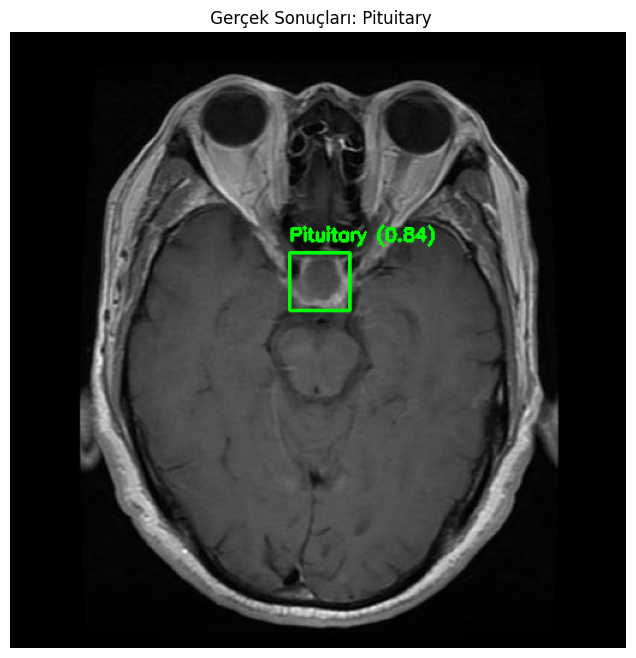


image 1/1 /content/Box_Temiz_Train_Test_Valid_Label_İslemi/test/images/Tr-me_0364.jpg: 512x512 2 Meningiomas, 12.5ms
Speed: 4.7ms preprocess, 12.5ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 512)


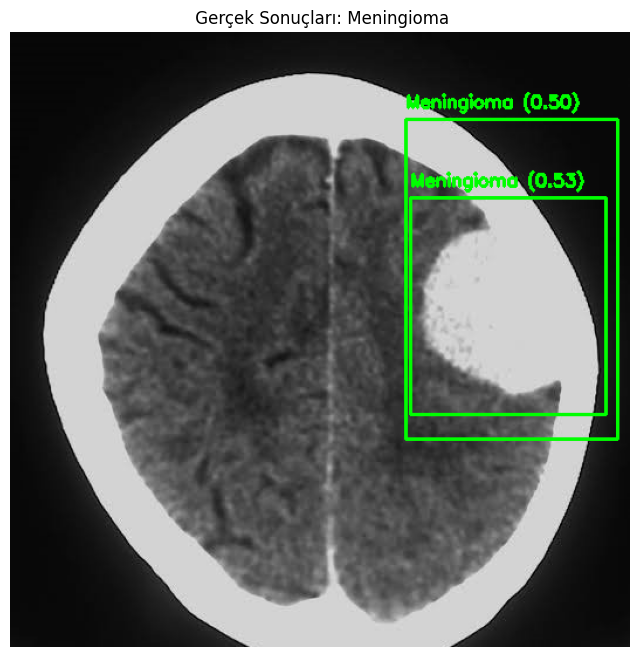


image 1/1 /content/Box_Temiz_Train_Test_Valid_Label_İslemi/test/images/Tr-pi_0736.jpg: 512x512 1 Pituitary, 15.2ms
Speed: 2.3ms preprocess, 15.2ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 512)


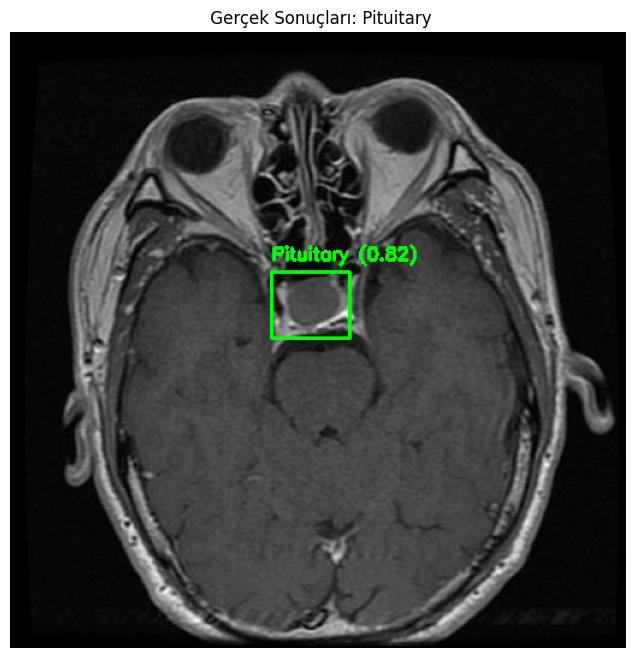


image 1/1 /content/Box_Temiz_Train_Test_Valid_Label_İslemi/test/images/Tr-pi_0920.jpg: 512x512 1 Pituitary, 12.0ms
Speed: 2.6ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 512)


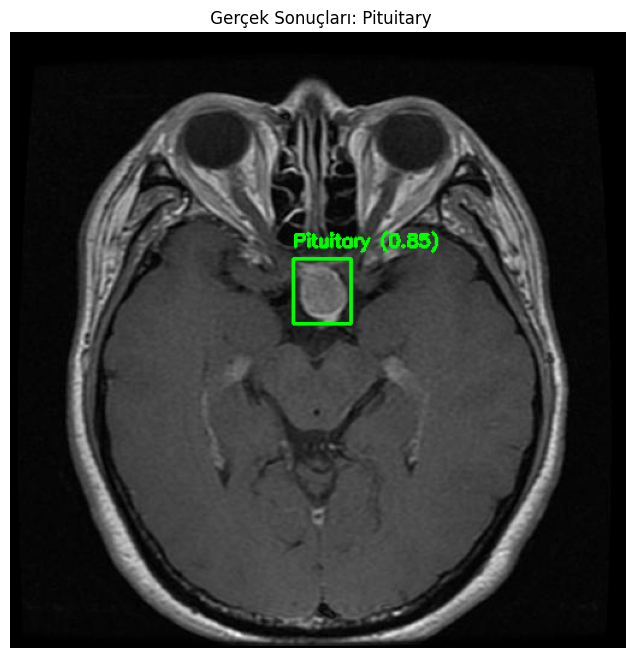


image 1/1 /content/Box_Temiz_Train_Test_Valid_Label_İslemi/test/images/Tr-me_0132.jpg: 512x512 1 Meningioma, 54.3ms
Speed: 18.2ms preprocess, 54.3ms inference, 7.9ms postprocess per image at shape (1, 3, 512, 512)


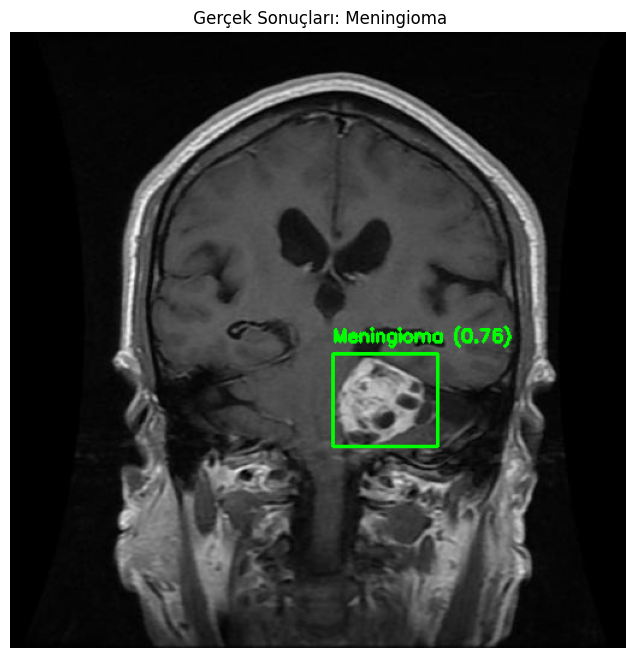


image 1/1 /content/Box_Temiz_Train_Test_Valid_Label_İslemi/test/images/Tr-me_0223.jpg: 512x512 1 Meningioma, 12.8ms
Speed: 2.9ms preprocess, 12.8ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 512)


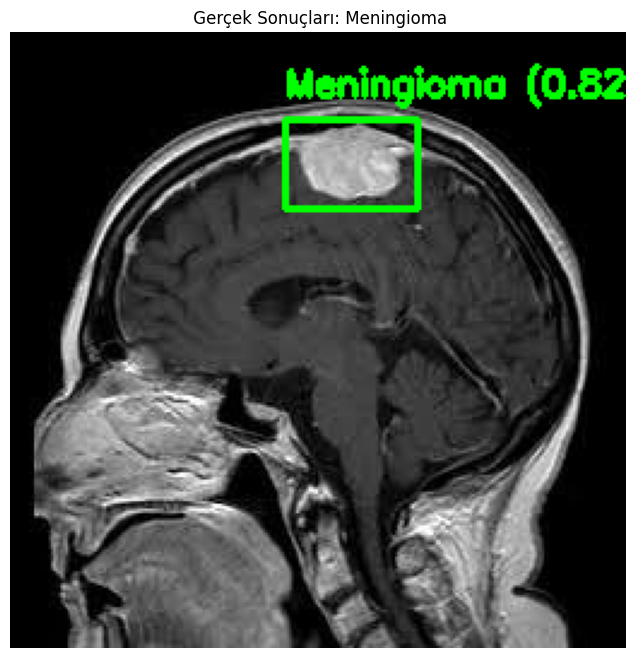


image 1/1 /content/Box_Temiz_Train_Test_Valid_Label_İslemi/test/images/Tr-pi_0289.jpg: 512x512 1 Pituitary, 14.3ms
Speed: 2.1ms preprocess, 14.3ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 512)


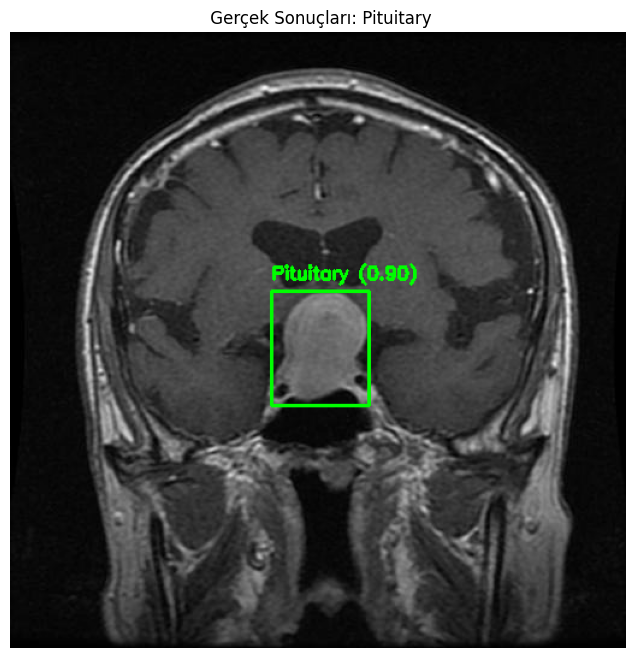


image 1/1 /content/Box_Temiz_Train_Test_Valid_Label_İslemi/test/images/Tr-me_0069.jpg: 512x512 1 Meningioma, 12.9ms
Speed: 2.4ms preprocess, 12.9ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 512)


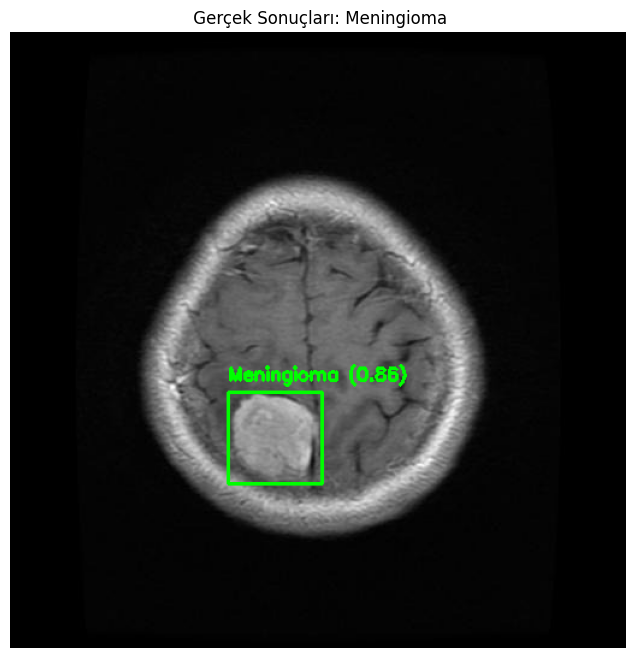


image 1/1 /content/Box_Temiz_Train_Test_Valid_Label_İslemi/test/images/Tr-pi_0424.jpg: 512x512 1 Pituitary, 13.4ms
Speed: 1.9ms preprocess, 13.4ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 512)


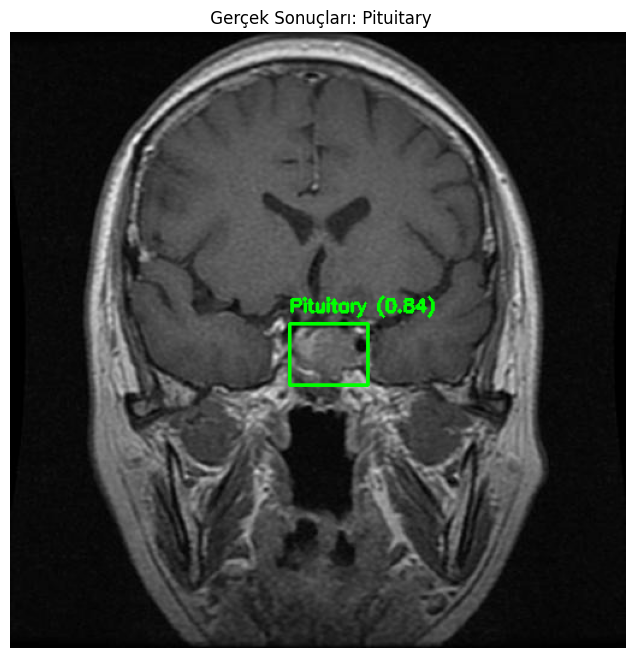


image 1/1 /content/Box_Temiz_Train_Test_Valid_Label_İslemi/test/images/Tr-me_0373.jpg: 512x512 1 Meningioma, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 512)


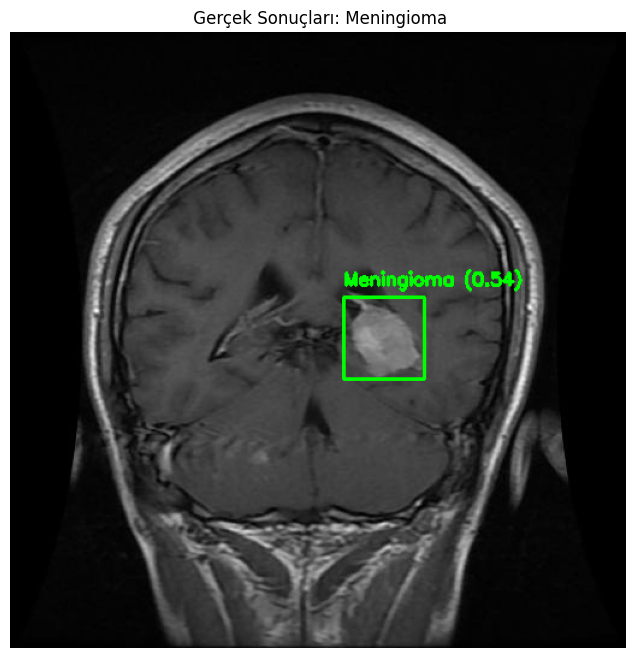

Tahmin görselleştirmeleri /content/visualized_predictions klasörüne kaydedildi.


In [ ]:
import os
import random
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Test görüntüleri ve etiketler klasörleri
test_images_path = '/content/Box_Temiz_Train_Test_Valid_Label_İslemi/test/images'
test_labels_path = '/content/Box_Temiz_Train_Test_Valid_Label_İslemi/test/labels'

# Görselleştirilmiş tahmin sonuçlarını kaydetmek için yeni klasör
output_path = '/content/visualized_predictions'
os.makedirs(output_path, exist_ok=True)

# Eğitilen modeli yükle
model = YOLO('/content/yolo_training_1/yolo_v11_model/weights/best.pt')  # Eğitilen modelin ağırlıklarını yükleyin

# Klasördeki tüm görüntüleri listele
all_images = [img for img in os.listdir(test_images_path) if img.endswith(('.jpg', '.png'))]

# 10 rastgele görüntü seç
random_images = random.sample(all_images, 10)

# Fonksiyon: Gerçek sınıfı etiket dosyasından okuma
def get_true_class(image_name, labels_path):
    label_file = os.path.join(labels_path, image_name.replace('.jpg', '.txt').replace('.png', '.txt'))
    if os.path.exists(label_file):
        with open(label_file, 'r') as f:
            first_line = f.readline().strip()
            if first_line:
                return int(first_line.split()[0])  # İlk satırdaki sınıf ID'sini alır
    return None

# Sınıf isimleri
class_names = ['Glioma', 'Meningioma', 'Pituitary']

# Tahmin ve görselleştirme işlemi
for image_name in random_images:
    image_path = os.path.join(test_images_path, image_name)

    # Tahmin yap
    results = model(image_path, conf=0.5)

    # Görüntüyü yükle
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Gerçek sınıfı al
    true_class_id = get_true_class(image_name, test_labels_path)
    true_class_name = class_names[true_class_id] if true_class_id is not None else "Unknown"

    # Tahmin edilen sınıflar ve doğruluk oranları
    predictions = results[0].boxes
    if predictions is not None:
        for box in predictions:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = box.conf[0]  # Doğruluk oranı
            predicted_class = int(box.cls[0])
            predicted_class_name = class_names[predicted_class]

            # Tahmin bilgilerini görüntünün üzerine çiz
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            label = f"{predicted_class_name} ({conf:.2f})"
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


    # Görselleştirme
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f" Gerçek Sonuçları: {true_class_name}")
    plt.show()

    # Görüntüyü kaydet
    output_image_path = os.path.join(output_path, image_name)
    cv2.imwrite(output_image_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

print(f"Tahmin görselleştirmeleri {output_path} klasörüne kaydedildi.")



image 1/1 /content/Box_Temiz_Train_Test_Valid_Label_İslemi/test/images/Tr-me_0093.jpg: 512x512 1 Meningioma, 8.0ms
Speed: 1.3ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /content/Box_Temiz_Train_Test_Valid_Label_İslemi/test/images/Tr-me_1305.jpg: 512x512 1 Meningioma, 8.8ms
Speed: 1.3ms preprocess, 8.8ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /content/Box_Temiz_Train_Test_Valid_Label_İslemi/test/images/Tr-pi_1230.jpg: 512x512 1 Pituitary, 13.5ms
Speed: 1.8ms preprocess, 13.5ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /content/Box_Temiz_Train_Test_Valid_Label_İslemi/test/images/Tr-gl_0095.jpg: 512x512 1 Glioma, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /content/Box_Temiz_Train_Test_Valid_Label_İslemi/test/images/Tr-pi_0563.jpg: 512x512 1 Pituitary, 17.3ms
Speed: 1.8ms preprocess, 17.3ms infer

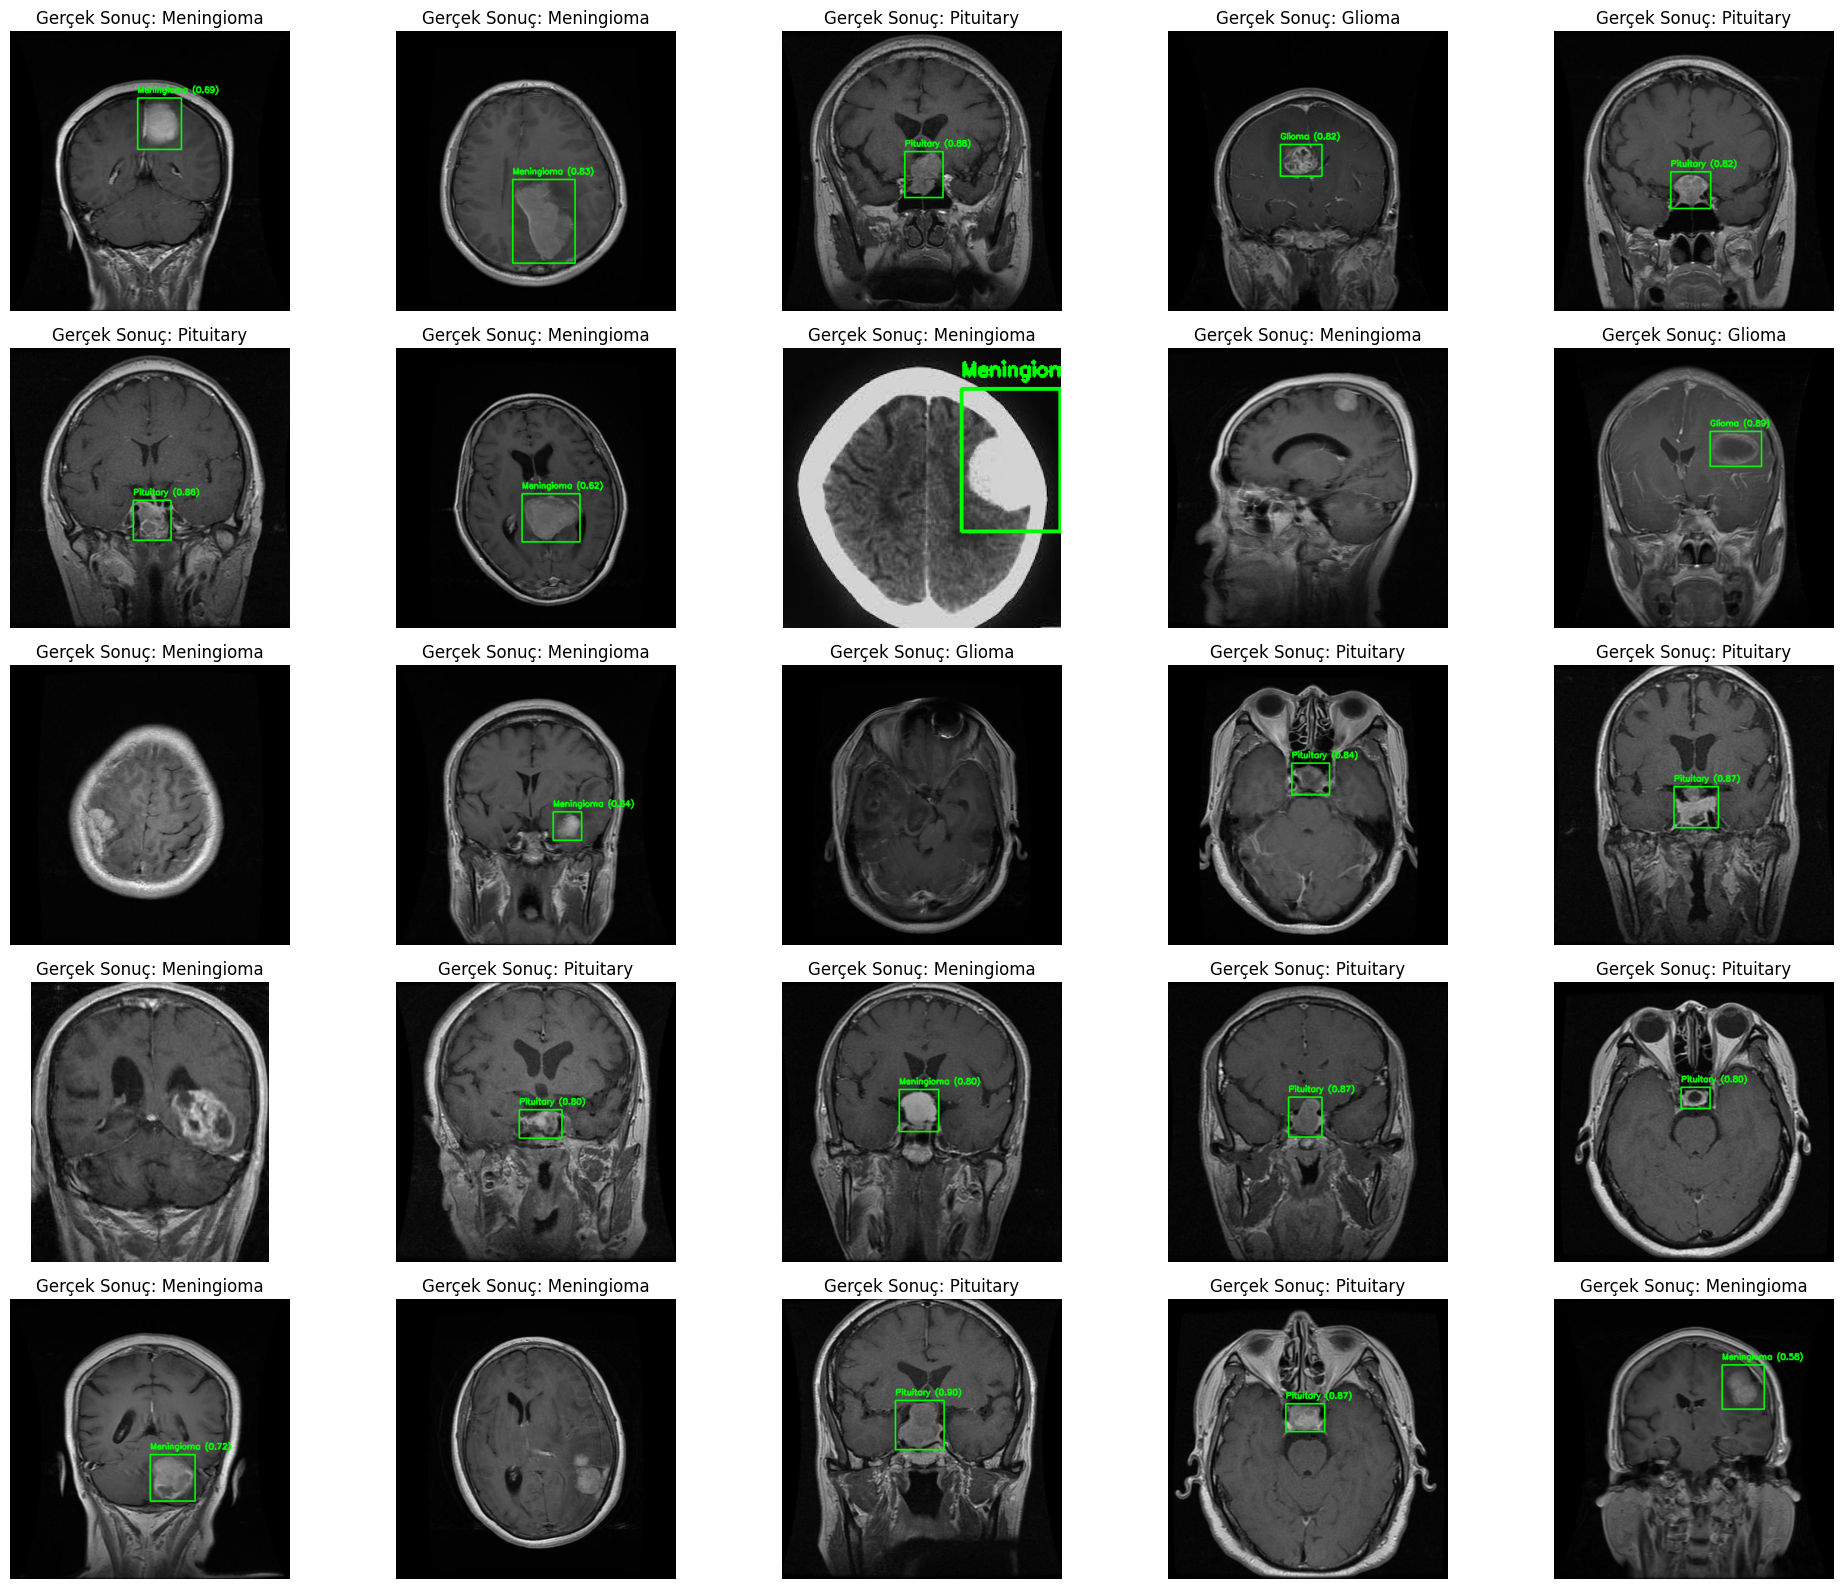

Tahminler görselleştirildi.


In [ ]:
# Tahmin ve görselleştirme işlemi
import matplotlib.pyplot as plt
import cv2
import os
import random
from ultralytics import YOLO

# Test görüntüleri ve etiketler klasörleri
test_images_path = '/content/Box_Temiz_Train_Test_Valid_Label_İslemi/test/images'
test_labels_path = '/content/Box_Temiz_Train_Test_Valid_Label_İslemi/test/labels'

# Görselleştirilmiş tahmin sonuçlarını kaydetmek için yeni klasör
output_path = '/content/visualized_predictions'
os.makedirs(output_path, exist_ok=True)

# Eğitilen modeli yükle
model = YOLO('/content/yolo_training_1/yolo_v11_model/weights/best.pt')  # Eğitilen modelin ağırlıklarını yükleyin

# Klasördeki tüm görüntüleri listele
all_images = [img for img in os.listdir(test_images_path) if img.endswith(('.jpg', '.png'))]

# 20 rastgele görüntü seç
random_images = random.sample(all_images, 25)

# Fonksiyon: Gerçek sınıfı etiket dosyasından okuma
def get_true_class(image_name, labels_path):
    label_file = os.path.join(labels_path, image_name.replace('.jpg', '.txt').replace('.png', '.txt'))
    if os.path.exists(label_file):
        with open(label_file, 'r') as f:
            first_line = f.readline().strip()
            if first_line:
                return int(first_line.split()[0])  # İlk satırdaki sınıf ID'sini alır
    return None

# Sınıf isimleri
class_names = ['Glioma', 'Meningioma', 'Pituitary']

# Tahmin ve görselleştirme işlemi
fig, axes = plt.subplots(5, 5, figsize=(20, 16)) # 4x5 grid for images
axes = axes.ravel()  # Flatten the array for easier indexing
for i, image_name in enumerate(random_images):
    image_path = os.path.join(test_images_path, image_name)

    # Tahmin yap
    results = model(image_path, conf=0.5)

    # Görüntüyü yükle
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Gerçek sınıfı al
    true_class_id = get_true_class(image_name, test_labels_path)
    true_class_name = class_names[true_class_id] if true_class_id is not None else "Unknown"

    # Tahmin edilen sınıflar ve doğruluk oranları
    predictions = results[0].boxes
    if predictions is not None:
        for box in predictions:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = box.conf[0]  # Doğruluk oranı
            predicted_class = int(box.cls[0])
            predicted_class_name = class_names[predicted_class]

            # Tahmin bilgilerini görüntünün üzerine çiz
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            label = f"{predicted_class_name} ({conf:.2f})"
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Görselleştirme
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"Gerçek Sonuç: {true_class_name}")

# Boş hücrelerin görselleştirmesini kaldır
for i in range(len(random_images), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

print(f"Tahminler görselleştirildi.")


In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

project_dir = "/content/drive/MyDrive/YOLO_Project"
os.makedirs(project_dir, exist_ok=True)

from google.colab import drive
import opendatasets as od
import os
import shutil
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from ultralytics import YOLO
import pandas as pd
import random
import matplotlib.pyplot as plt


trained_model_path = '/content/yolo_training_1/yolo_v11_model/weights/best.pt'
destination_path = os.path.join(project_dir, "best.pt")

if os.path.exists(trained_model_path):
    shutil.copy2(trained_model_path, destination_path)
    print(f"Model weights copied to: {destination_path}")
else:
    print(f"Error: Model weights file not found at {trained_model_path}")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model weights copied to: /content/drive/MyDrive/YOLO_Project/best.pt


In [ ]:
import pandas as pd

results_df = pd.read_csv('/content/drive/MyDrive/YOLO_Project/yolo_v11_model/results.csv')
results_df

epoch       time  train/box_loss  train/cls_loss  train/dfl_loss  \
0        1    37.7739         1.54630         3.19086         1.40068   
1        2    69.2342         1.57346         2.19388         1.40538   
2        3   100.2030         1.60763         1.95893         1.43348   
3        4   129.2030         1.56740         1.72022         1.38392   
4        5   160.6620         1.53949         1.57780         1.37893   
..     ...        ...             ...             ...             ...   
145    146  4402.5600         0.88210         0.52776         1.03222   
146    147  4430.0900         0.88863         0.52807         1.03897   
147    148  4461.1600         0.87798         0.51986         1.02862   
148    149  4488.3200         0.87615         0.52267         1.02805   
149    150  4519.4900         0.87728         0.52045         1.04051   

     metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0                 0.56927            0.41720           0.48152   
1                 0.57617            0.49673           0.50579   
2                 0.61488            0.48134           0.46682   
3                 0.59596            0.60499           0.57633   
4                 0.60542            0.62004           0.56753   
..                    ...                ...               ...   
145               0.85161            0.74626           0.76255   
146               0.85542            0.74103           0.75908   
147               0.86789            0.74103           0.76085   
148               0.86512            0.74103           0.76122   
149               0.86669            0.74103           0.76036   

     metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0                0.28436       1.49867       2.55221       1.27864  0.000472   
1                0.29467       1.55702       1.93898       1.46315  0.000942   
2                0.29224       1.55021       2.06922       1.38918  0.001406   
3                0.33746       1.58500       1.70255       1.44523  0.001401   
4                0.35195       1.49232       1.89944       1.40191  0.001391   
..                   ...           ...           ...           ...       ...   
145              0.50597       1.27813       0.94073       1.22867  0.000061   
146              0.51265       1.26820       0.93831       1.22897  0.000052   
147              0.51037       1.27880       0.94361       1.23737  0.000043   
148              0.51160       1.27761       0.94143       1.23558  0.000033   
149              0.51154       1.27975       0.94805       1.23504  0.000024   

       lr/pg1    lr/pg2  
0    0.000472  0.000472  
1    0.000942  0.000942  
2    0.001406  0.001406  
3    0.001401  0.001401  
4    0.001391  0.001391  
..        ...       ...  
145  0.000061  0.000061  
146  0.000052  0.000052  
147  0.000043  0.000043  
148  0.000033  0.000033  
149  0.000024  0.000024  

[150 rows x 15 columns]

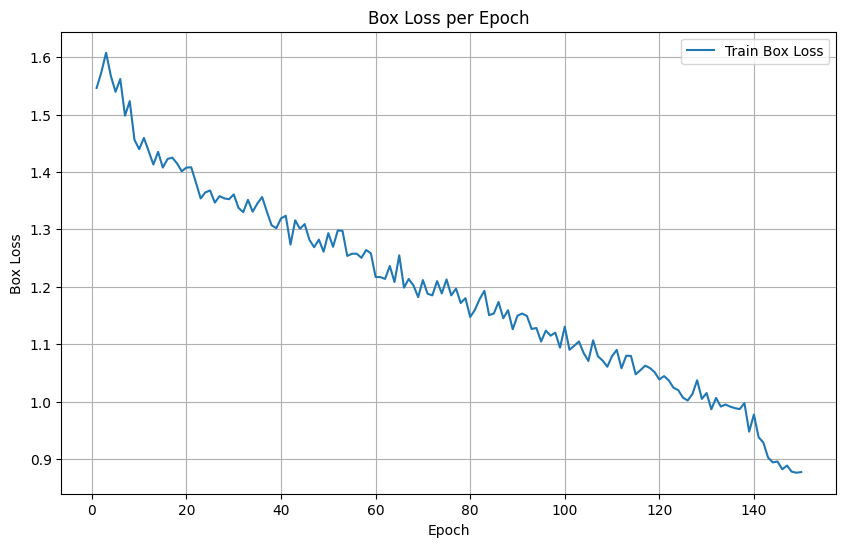

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(results_df['epoch'], results_df['train/box_loss'], label='Train Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Box Loss')
plt.title('Box Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

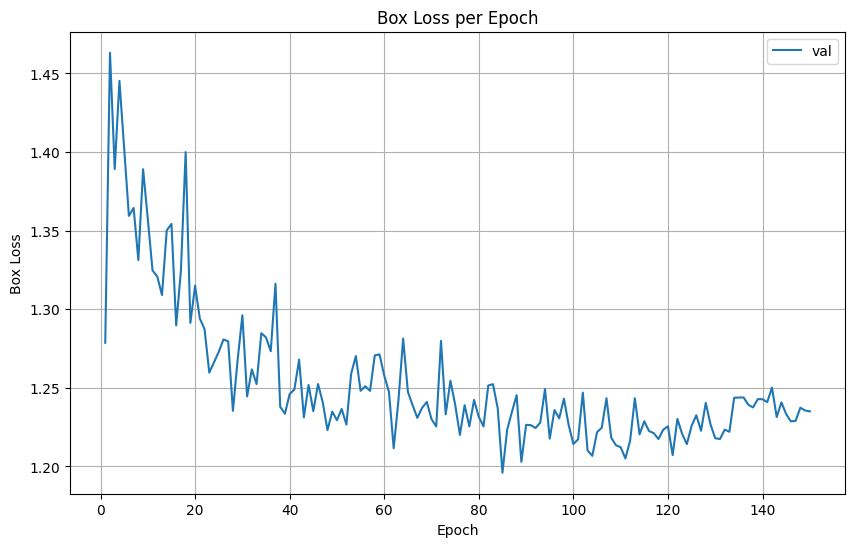

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(results_df['epoch'], results_df['val/dfl_loss'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Box Loss')
plt.title('Box Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

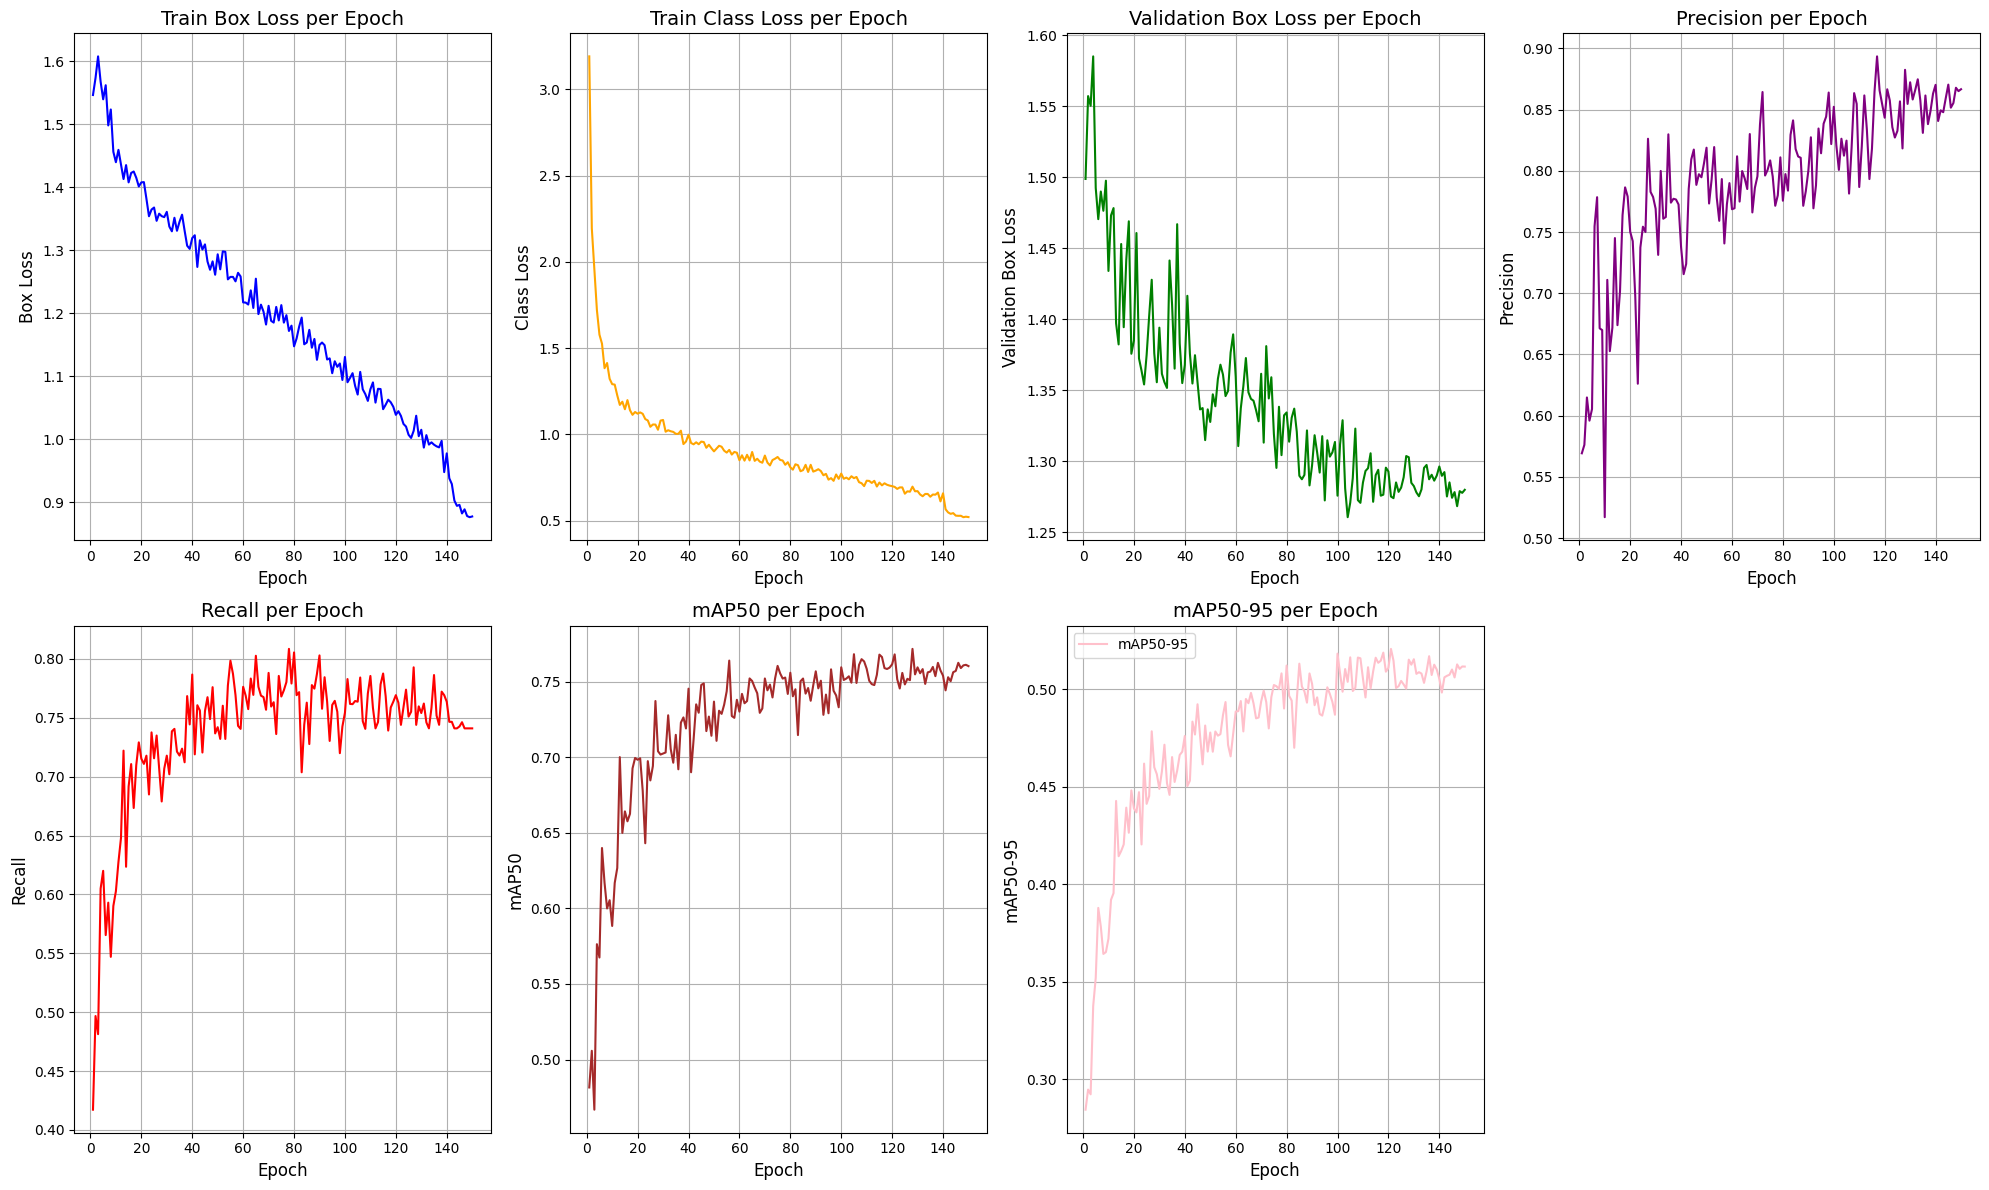

In [ ]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 4, 1)
plt.plot(results_df['epoch'], results_df['train/box_loss'], label='train/box_loss', color='blue')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Box Loss', fontsize=12)
plt.title('Train Box Loss per Epoch', fontsize=14)
plt.grid(True)

plt.subplot(2, 4, 2)
plt.plot(results_df['epoch'], results_df['train/cls_loss'], label='train/cls_loss', color='orange')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Class Loss', fontsize=12)
plt.title('Train Class Loss per Epoch', fontsize=14)
plt.grid(True)

plt.subplot(2, 4, 3)
plt.plot(results_df['epoch'], results_df['val/box_loss'], label='val/box_loss', color='green')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Validation Box Loss', fontsize=12)
plt.title('Validation Box Loss per Epoch', fontsize=14)
plt.grid(True)

plt.subplot(2, 4, 4)
plt.plot(results_df['epoch'], results_df['metrics/precision(B)'], label='Precision', color='purple')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision per Epoch', fontsize=14)
plt.grid(True)

plt.subplot(2, 4, 5)
plt.plot(results_df['epoch'], results_df['metrics/recall(B)'], label='Recall', color='red')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.title('Recall per Epoch', fontsize=14)
plt.grid(True)

plt.subplot(2, 4, 6)
plt.plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label='mAP50', color='brown')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('mAP50', fontsize=12)
plt.title('mAP50 per Epoch', fontsize=14)
plt.grid(True)

plt.subplot(2, 4, 7)
plt.plot(results_df['epoch'], results_df['metrics/mAP50-95(B)'], label='mAP50-95', color='pink')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('mAP50-95', fontsize=12)
plt.title('mAP50-95 per Epoch', fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.legend(fontsize=10)
plt.show()